## All libraries we need
##### are here

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:

# Load the dataset
path_to_data = 'kaggle_london_house_price_data.csv'
df = pd.read_csv(path_to_data)
df.columns  # Inspect column names


Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')

In [4]:
#df.info() 
#df.head()  # Показать первые 5 строк (по умолчанию) или указать количество строк, например:  df.head(10)
#df.tail() 
#df.shape # rows, columns
#df.describe()
df['currentEnergyRating'].unique() 
#df.iloc[-5:, :]
#df.iloc[2:5,1:6]


array([nan, 'D', 'E', 'C', 'B', 'G', 'F', 'A'], dtype=object)

In [5]:
# Number of rows for each number of bedrooms
bedroom_summary = df['bedrooms'].value_counts().sort_index()
print("Number of rows for each number of bedrooms:")
print(bedroom_summary)

# Filter rows where the number of bedrooms is greater than 8
filtered_data = df[df['bedrooms'] > 8][['bedrooms', 'saleEstimate_currentPrice', 'floorAreaSqM']]

# Display the filtered data
print("\nProperties with more than 8 bedrooms:")
print(filtered_data)

# Optional: Save the filtered data to a CSV file
filtered_data.to_csv('filtered_properties.csv', index=False)

Number of rows for each number of bedrooms:
bedrooms
1.0    49657
2.0    96214
3.0    65392
4.0    29441
5.0    11908
6.0     3134
7.0      645
8.0      198
9.0       65
Name: count, dtype: int64

Properties with more than 8 bedrooms:
        bedrooms  saleEstimate_currentPrice  floorAreaSqM
3149         9.0                  1074000.0         239.0
29826        9.0                   853000.0         330.0
29827        9.0                   853000.0         330.0
29828        9.0                   853000.0         330.0
48414        9.0                  5992000.0         400.0
...          ...                        ...           ...
277649       9.0                   368000.0          28.0
277650       9.0                   368000.0          28.0
277651       9.0                   368000.0          28.0
277652       9.0                   368000.0          28.0
277653       9.0                   368000.0          28.0

[65 rows x 3 columns]


In [6]:
# Modify postcode to retain only the first part and one character after the space
df['postcode'] = df['postcode'].str.extract(r'(\S+ \S)')

In [7]:
df['postcode']

0           E1 8
1           E1 8
2           E1 7
3           E1 7
4           E1 7
           ...  
282867    WC2R 1
282868    WC2R 1
282869    WC2R 1
282870    WC2R 3
282871    WC2R 3
Name: postcode, Length: 282872, dtype: object

In [8]:
postcodes = pd.read_csv('postcodes.csv')

# remove %
postcodes['Percent'] = postcodes['Percent'].str.rstrip('%').astype(float)

print(postcodes.head())

  Postcode  Percent
0    BR1 4     58.0
1    BR1 5     49.0
2    BR3 5     61.0
3     E1 0     58.0
4     E1 1     57.0


In [9]:
# Объединение таблиц по посткодам
df = df.merge(postcodes, left_on='postcode', right_on='Postcode', how='left')



In [10]:
df.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange', 'Postcode',
       'Percent'],
      dtype='object')

In [11]:
# Drop unnecessary columns
df = df.drop(['fullAddress', 'outcode', 'country', 'saleEstimate_ingestedAt','tenure', 'rentEstimate_lowerPrice',
       'rentEstimate_currentPrice', 'rentEstimate_upperPrice',
       'saleEstimate_lowerPrice', 'currentEnergyRating',
       'saleEstimate_upperPrice', 
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'], axis=1)

In [12]:
df = df.drop(columns=['postcode','Postcode'])


In [13]:
df.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'propertyType', 'saleEstimate_currentPrice',
       'saleEstimate_confidenceLevel', 'Percent'],
      dtype='object')

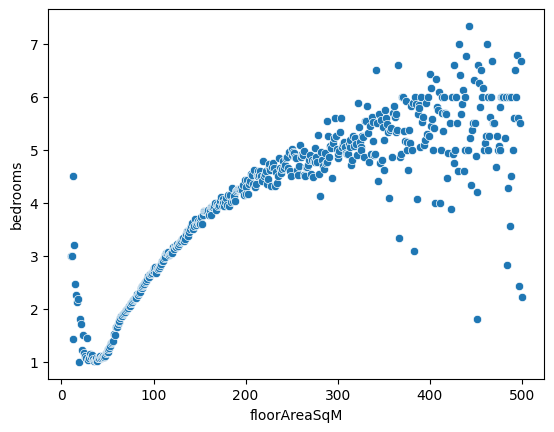

     floorAreaSqM  bedrooms
411         421.0       NaN
431         441.0       NaN
478         490.0       NaN


In [14]:
x = df.groupby(['floorAreaSqM'])['bedrooms'].mean().reset_index()

sns.scatterplot(data=x, x='floorAreaSqM', y='bedrooms')
plt.show()

print(x[x['bedrooms'].isnull() == True])

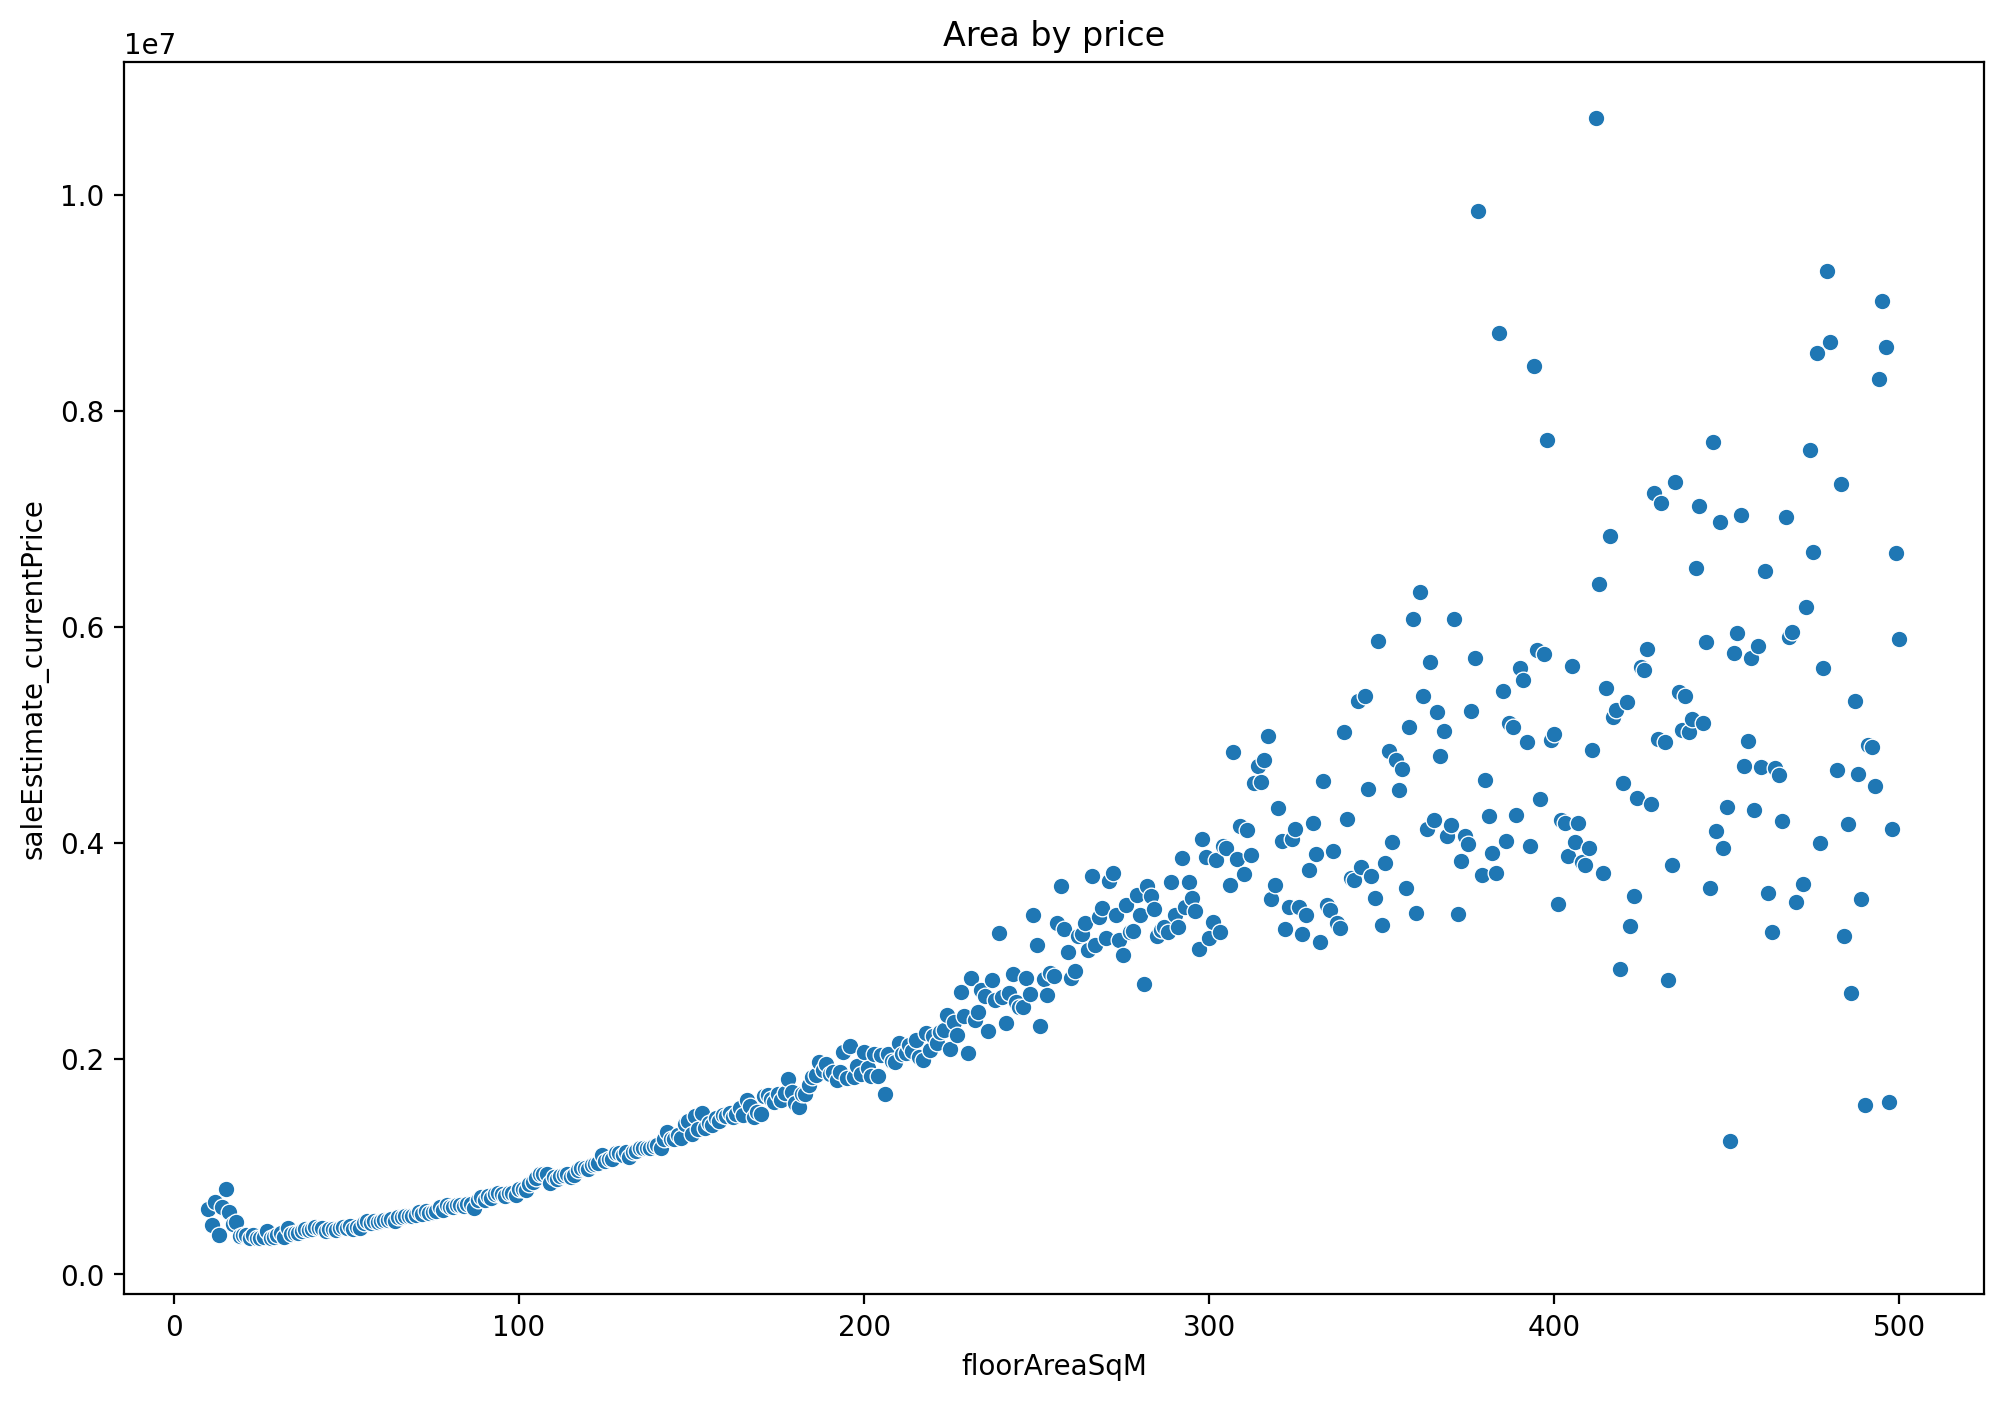

In [15]:
sqp = df.groupby(['floorAreaSqM'])['saleEstimate_currentPrice'].mean().reset_index()


plt.figure(figsize=(12, 8), dpi=200)

sns.scatterplot(data=sqp, x='floorAreaSqM', y='saleEstimate_currentPrice')

plt.title('Area by price')
plt.show()

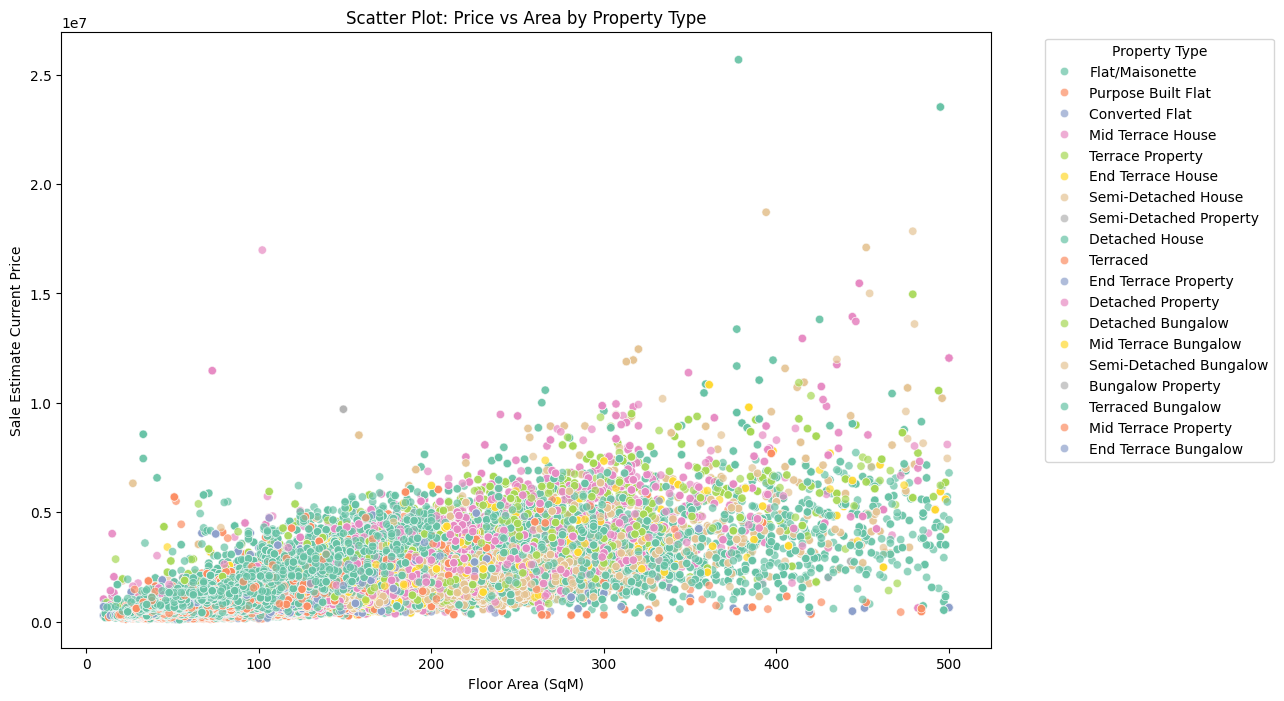

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='floorAreaSqM',  # Площадь
    y='saleEstimate_currentPrice',  # Цена
    hue='propertyType',  # Тип (отображается цветом)
    palette='Set2',
    alpha=0.7
)
plt.xlabel('Floor Area (SqM)')
plt.ylabel('Sale Estimate Current Price')
plt.title('Scatter Plot: Price vs Area by Property Type')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

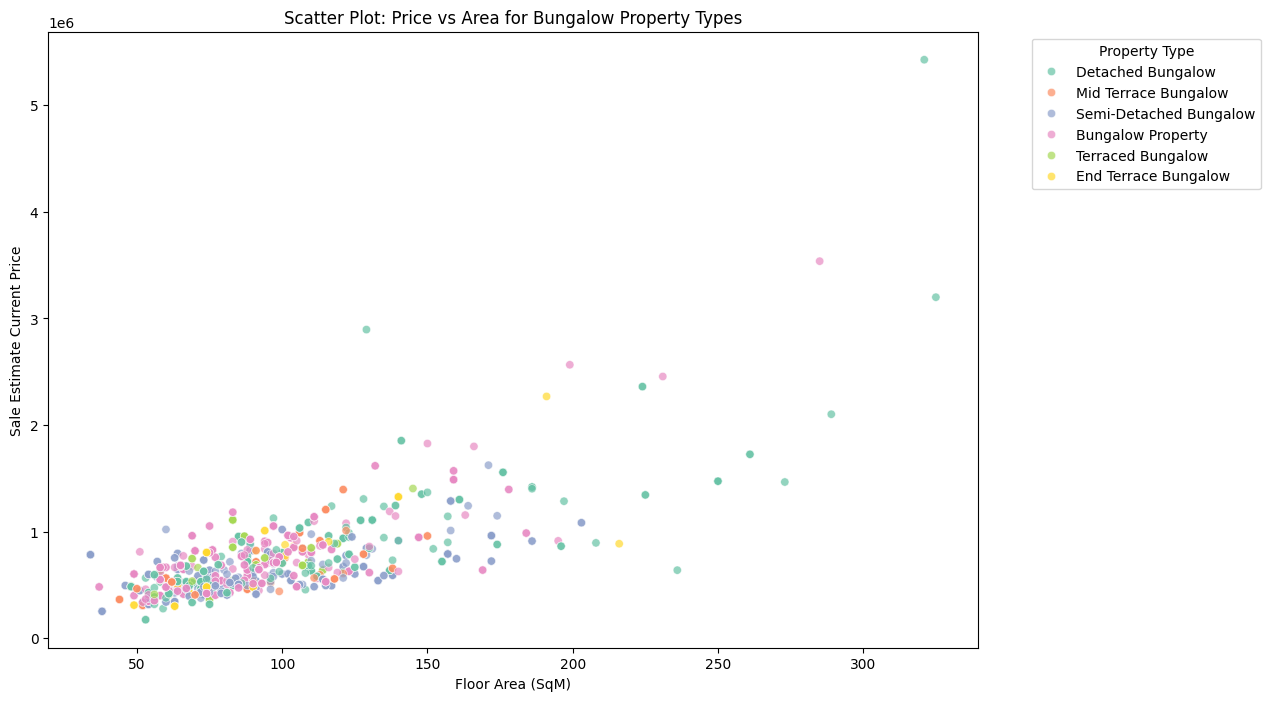

In [17]:
# Filter the data to include only rows where 'propertyType' contains the word "bungalow"
df_bungalow = df[df['propertyType'].str.contains('bungalow', case=False, na=False)]

# Plot the scatter plot for the filtered data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_bungalow,
    x='floorAreaSqM',  # Floor area in square meters
    y='saleEstimate_currentPrice',  # Sale price
    hue='propertyType',  # Property type displayed as colors
    palette='Set2',
    alpha=0.7
)
plt.xlabel('Floor Area (SqM)')
plt.ylabel('Sale Estimate Current Price')
plt.title('Scatter Plot: Price vs Area for Bungalow Property Types')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [18]:
# Filter the data to include only bungalows and prices above 2 million
bungalows_above_2m = df[
    df['propertyType'].str.contains('bungalow', case=False, na=False) & 
    (df['saleEstimate_currentPrice'] > 2000000)
]

# Display the filtered data
print(bungalows_above_2m)

# Optionally, save the filtered data to a file
# bungalows_above_2m.to_csv('bungalows_above_2m.csv', index=False)


         latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
75918   51.634909  -0.198433        2.0       4.0         289.0          4.0   
100210  51.578180  -0.188437        2.0       6.0         231.0          2.0   
103821  51.550609  -0.169875        NaN       NaN         321.0          NaN   
111117  51.631832  -0.242666        3.0       5.0         325.0          2.0   
196482  51.475501  -0.232515        NaN       NaN         129.0          NaN   
196704  51.467338  -0.250565        NaN       NaN         224.0          NaN   
196705  51.467338  -0.250565        NaN       NaN         224.0          NaN   
211499  51.429437  -0.206382        3.0       5.0         285.0          3.0   
211500  51.429851  -0.206702        3.0       3.0         199.0          2.0   
266269  51.489113  -0.265923        NaN       5.0         191.0          NaN   

                propertyType  saleEstimate_currentPrice  \
75918      Detached Bungalow                  2101000.0   
1

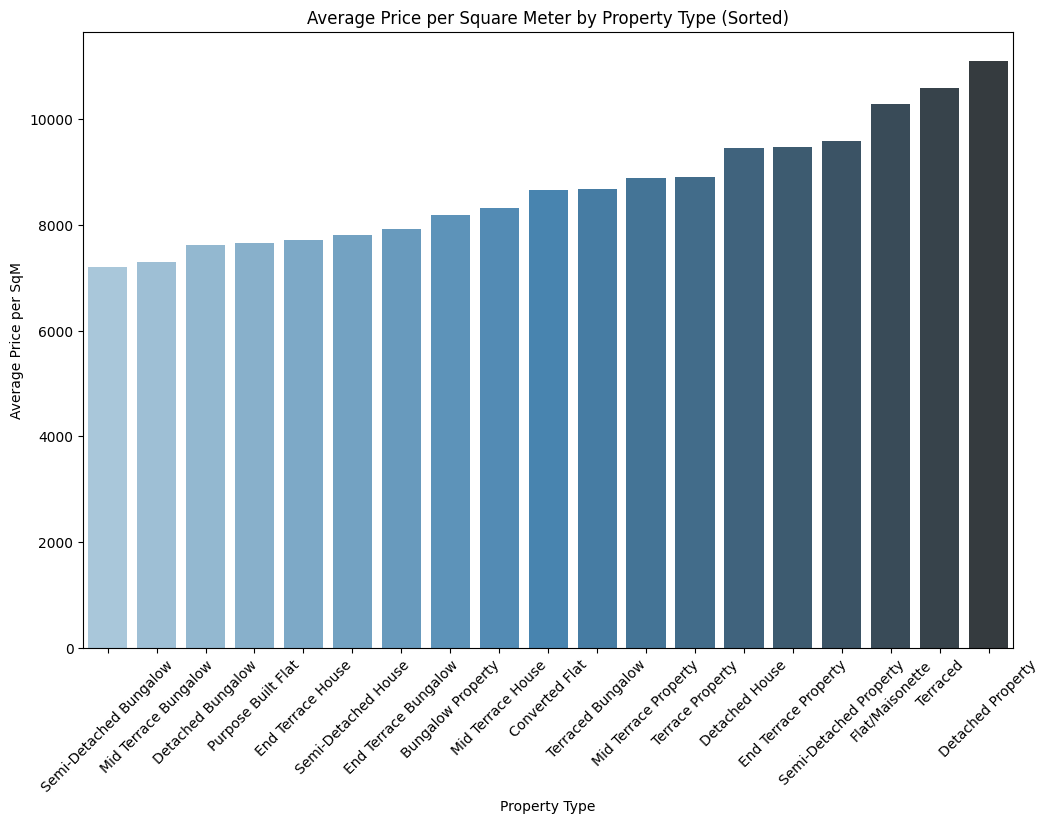

In [19]:
# Calculate price per square meter
df['pricePerSqM'] = df['saleEstimate_currentPrice'] / df['floorAreaSqM']

# Group by property type and calculate the average price per square meter
avg_price_per_sqm = df.groupby('propertyType')['pricePerSqM'].mean().reset_index()
avg_price_per_sqm_sorted = avg_price_per_sqm.sort_values(by='pricePerSqM', ascending=True)

# Plot the bar chart with sorted values
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_price_per_sqm_sorted,
    x='propertyType',
    y='pricePerSqM',
    hue='propertyType',  
    dodge=False,  
    palette='Blues_d'
)
plt.xlabel('Property Type')
plt.ylabel('Average Price per SqM')
plt.title('Average Price per Square Meter by Property Type (Sorted)')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Removes the legend since it's redundant here
plt.show()


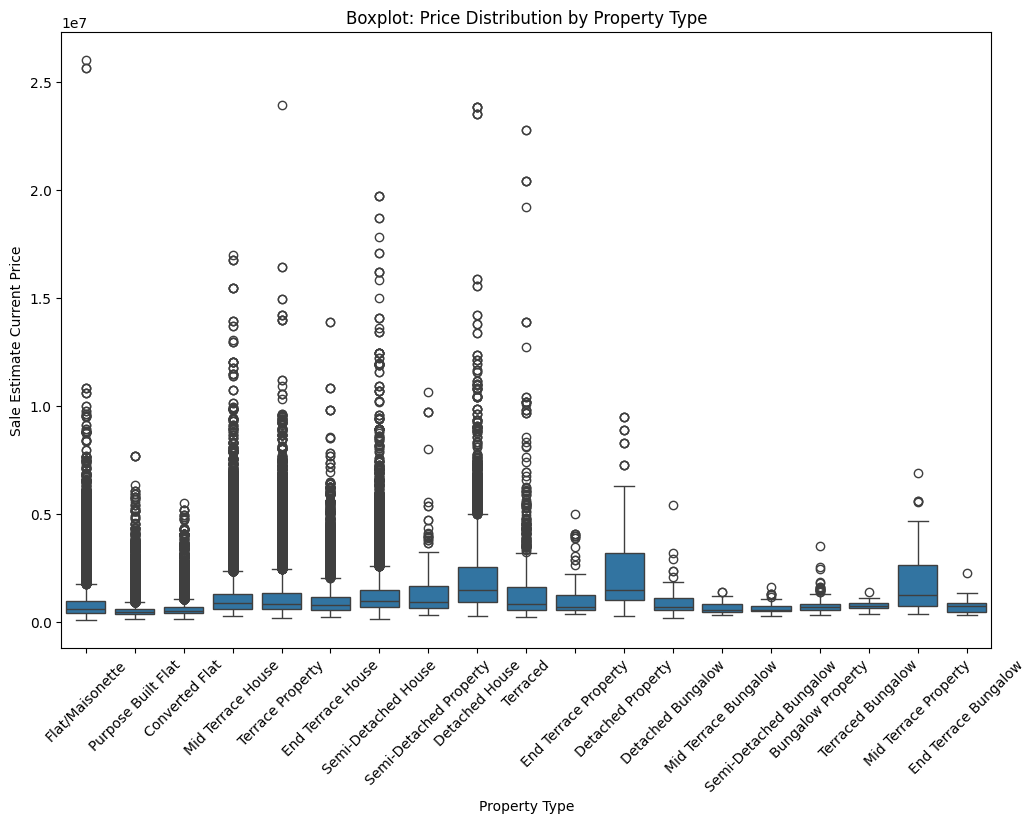

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='propertyType', y='saleEstimate_currentPrice')
plt.xlabel('Property Type')
plt.ylabel('Sale Estimate Current Price')
plt.title('Boxplot: Price Distribution by Property Type')
plt.xticks(rotation=45)  # Поворачивает подписи категорий для удобства
plt.show()


In [21]:
# Сгруппировать категории и отсортировать по средней цене за квадратный метр
avg_price_per_sqm_sorted = avg_price_per_sqm.sort_values(by='pricePerSqM', ascending=True)

# Создать словарь для замены категорий на числа
category_to_number = {category: i+1 for i, category in enumerate(avg_price_per_sqm_sorted['propertyType'])}

# Заменить категории на числа в исходном DataFrame
df['propertyType_numeric'] = df['propertyType'].map(category_to_number)

# Вывод результата
print(category_to_number)
print(df[['propertyType', 'propertyType_numeric']].head())


{'Semi-Detached Bungalow': 1, 'Mid Terrace Bungalow': 2, 'Detached Bungalow': 3, 'Purpose Built Flat': 4, 'End Terrace House': 5, 'Semi-Detached House': 6, 'End Terrace Bungalow': 7, 'Bungalow Property': 8, 'Mid Terrace House': 9, 'Converted Flat': 10, 'Terraced Bungalow': 11, 'Mid Terrace Property': 12, 'Terrace Property': 13, 'Detached House': 14, 'End Terrace Property': 15, 'Semi-Detached Property': 16, 'Flat/Maisonette': 17, 'Terraced': 18, 'Detached Property': 19}
         propertyType  propertyType_numeric
0     Flat/Maisonette                  17.0
1  Purpose Built Flat                   4.0
2  Purpose Built Flat                   4.0
3  Purpose Built Flat                   4.0
4  Purpose Built Flat                   4.0


In [22]:
df = df.drop(columns=['propertyType'])
df = df.drop(columns=['propertyType_numeric'])

In [23]:
df = df[df['saleEstimate_confidenceLevel'] == 'HIGH']

In [24]:
df = df.drop(columns=['saleEstimate_confidenceLevel'])

In [25]:
# Координаты Букингемского дворца
buckingham_lat = 51.501364
buckingham_lon = 0.14189

# Расчет расстояния по теореме Пифагора
df['distance_from_buckingham'] = ((abs(df['latitude']) - buckingham_lat)**2 + 
                                  (abs(df['longitude']) - buckingham_lon)**2)**0.5



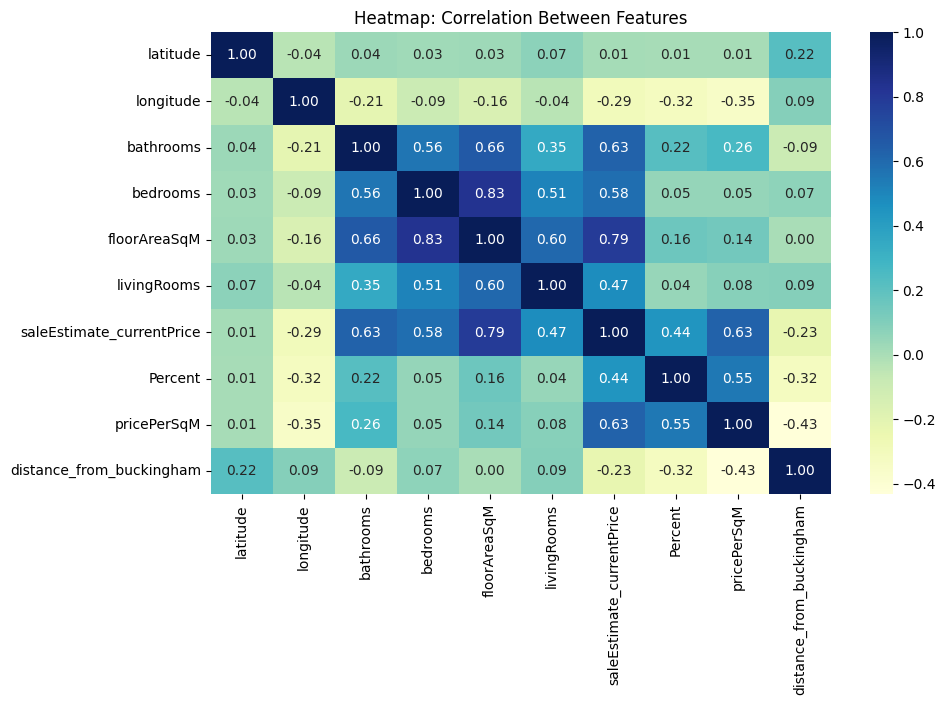

In [26]:
# Add a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Correlation Between Features")
plt.show()


# # Display correlation matrix 
# correlation_matrix = data.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix')
# plt.show()

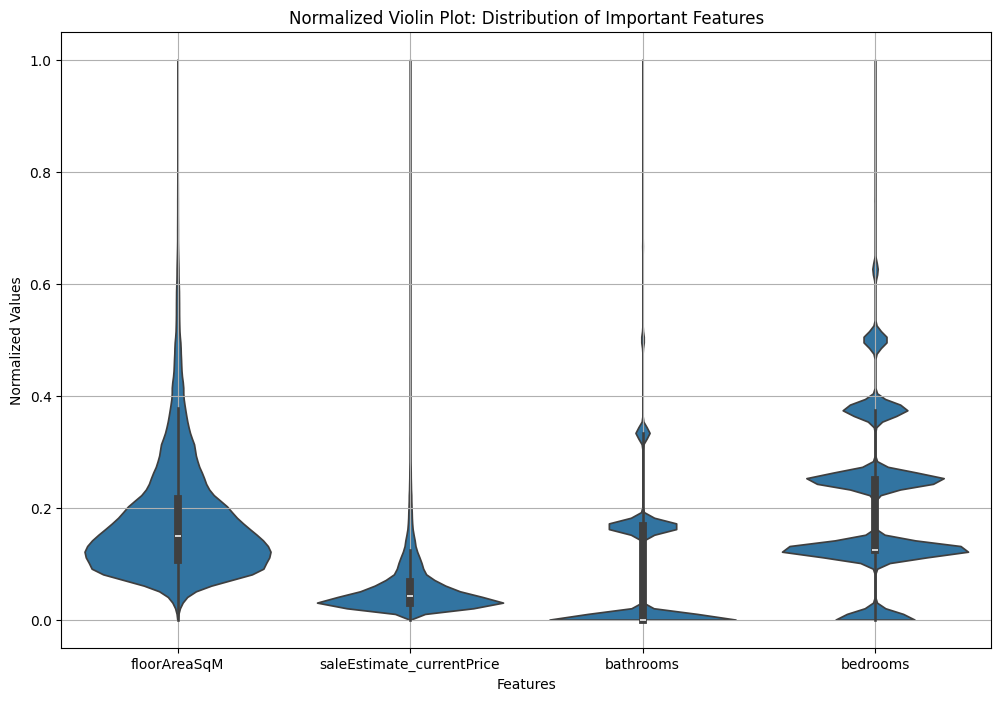

In [27]:
important_columns = ['floorAreaSqM', 'saleEstimate_currentPrice', 'bathrooms', 'bedrooms']
# Normalize the data
normalized_df = df[important_columns].copy()
for column in important_columns:
    normalized_df[column] = (normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min())

plt.figure(figsize=(12, 8))
df_melted = normalized_df.melt(var_name="Feature", value_name="Value")
sns.violinplot(x="Feature", y="Value", data=df_melted, density_norm="width", cut=0)
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.title("Normalized Violin Plot: Distribution of Important Features")
plt.grid(True)
plt.show()



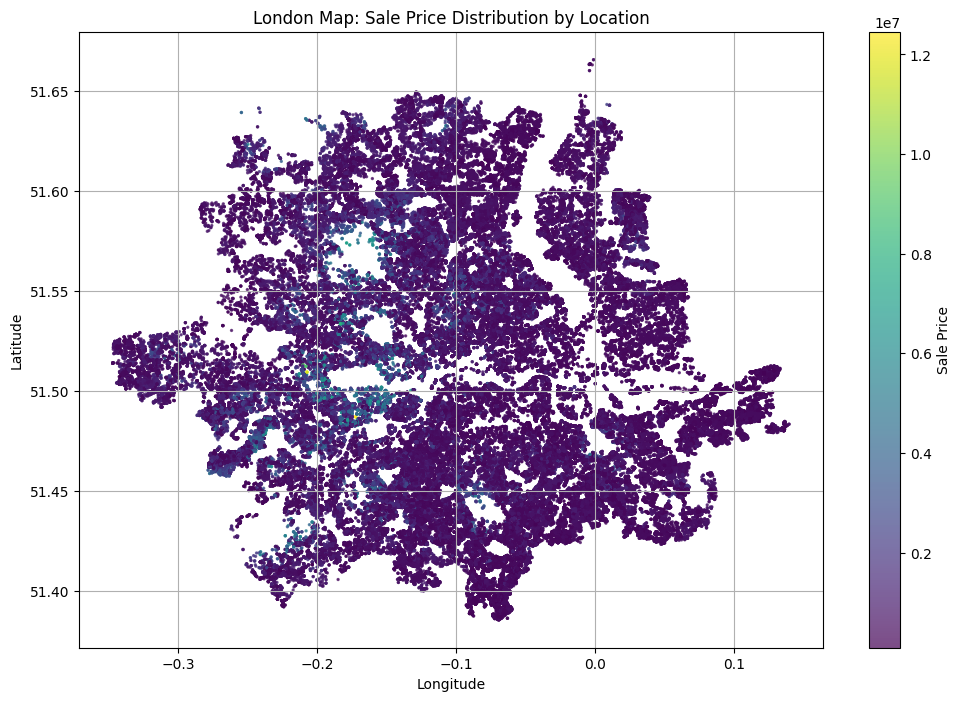

In [28]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [29]:
#def transform_ER()

In [30]:
lower_bound = df['saleEstimate_currentPrice'].quantile(0.05)  # 5th percentile
upper_bound = df['saleEstimate_currentPrice'].quantile(0.95)  # 95th percentile
df = df[(df['saleEstimate_currentPrice'] >= lower_bound) & (df['saleEstimate_currentPrice'] <= upper_bound)]

In [31]:
#lower_bound
#upper_bound

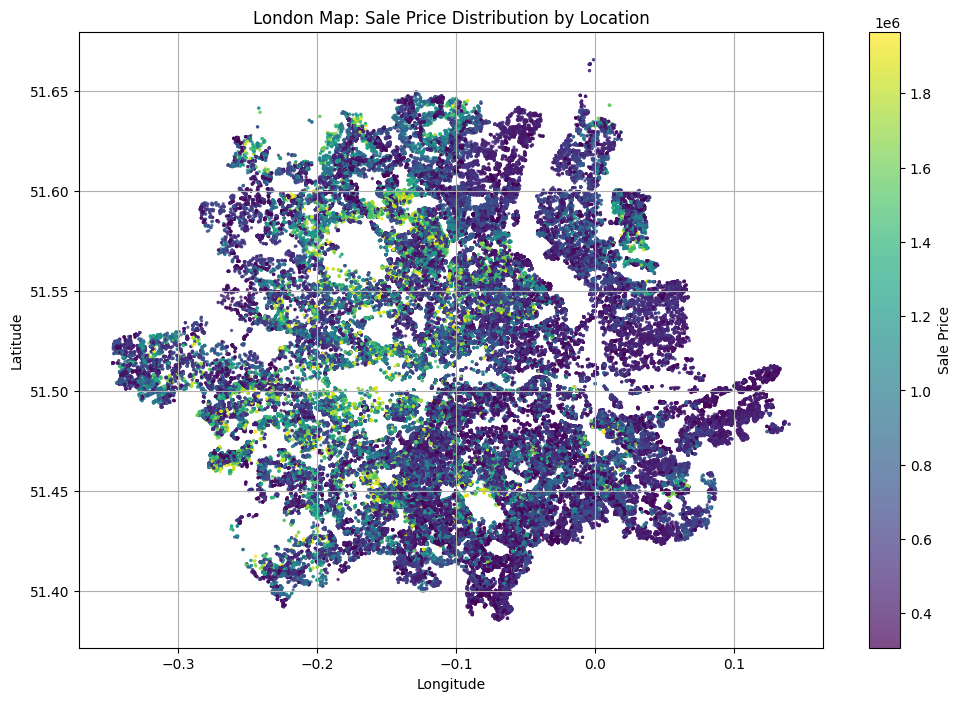

In [32]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [33]:
# Удаление столбцов latitude и longitude
#df = df.drop(['latitude', 'longitude'], axis=1)
df = df.drop(['latitude'], axis=1)

In [34]:
# Подсчет пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])


bathrooms       21799
bedrooms         8212
floorAreaSqM     4626
livingRooms     14501
Percent           185
pricePerSqM      4626
dtype: int64


In [35]:
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])


bathrooms       11.849021
bedrooms         4.463698
floorAreaSqM     2.514499
livingRooms      7.882135
Percent          0.100558
pricePerSqM      2.514499
dtype: float64


K Nearest Neighbors 

https://www.youtube.com/watch?v=0p0o5cmgLdE

https://www.youtube.com/watch?v=b6uHw7QW_n4

In [36]:
#df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
#df['livingRooms'].fillna(df['livingRooms'].median(), inplace=True)

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df[['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'Percent', 'pricePerSqM']] = imputer.fit_transform(df[['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'Percent', 'pricePerSqM']])

In [37]:
df = df.dropna()
#df = df.drop_duplicates()

In [38]:
df.shape

(156497, 9)

In [39]:
#df = df.drop(['Percent'], axis=1)

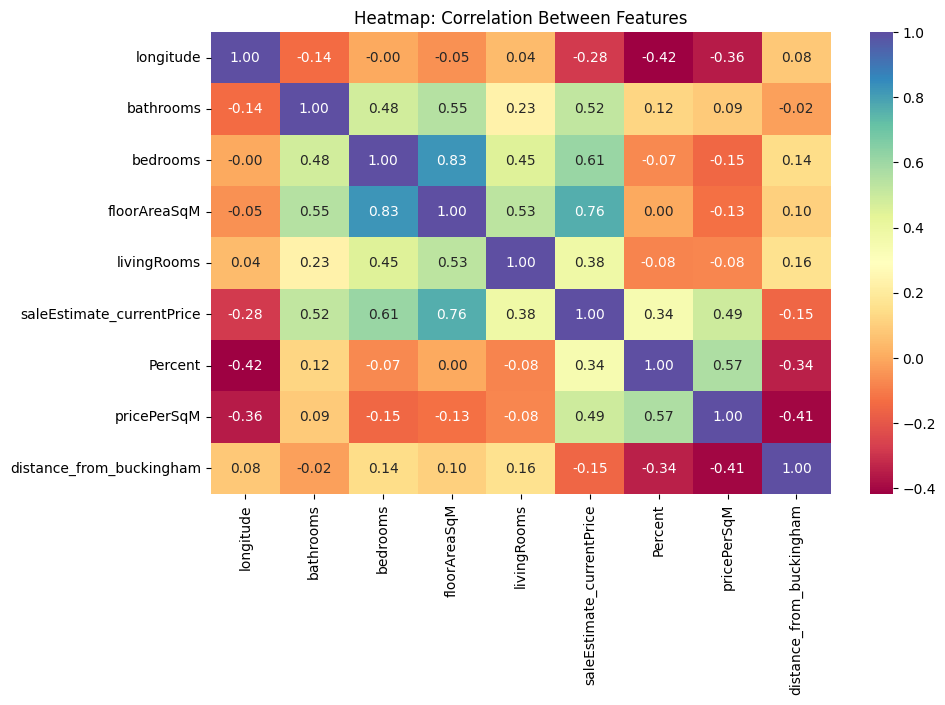

In [40]:
# Add a heatmap #2
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f")
plt.title("Heatmap: Correlation Between Features")
plt.show()


In [41]:
# Create a function to test dropping each feature
def feature_drop_analysis(df, target_column):
    features = df.drop(target_column, axis=1).columns
    statistics = []  # List to store RMSE and R^2 values for each scenario

    # Iterate over each feature to drop it
    for feature in features:
        # Create a temporary dataset excluding the current feature
        temp_df = df.drop(feature, axis=1)

        # Define features and target variable
        X = temp_df.drop(target_column, axis=1)
        y = temp_df[target_column]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Store the results
        statistics.append({'Dropped Feature': feature, 'RMSE': rmse, 'R^2': r2})

    # Return statistics as a DataFrame
    return pd.DataFrame(statistics)



In [42]:
# Call the function and analyze feature importance
target_column = 'saleEstimate_currentPrice'  # Target variable
stats_df = feature_drop_analysis(df, target_column)

# Display the results without using additional libraries
print("Feature Drop Analysis Statistics:")
print(stats_df)

# The original dataset remains unchanged, you can now proceed with the original code

Feature Drop Analysis Statistics:
            Dropped Feature           RMSE       R^2
0                 longitude   90526.855903  0.937207
1                 bathrooms   90288.082502  0.937538
2                  bedrooms   90277.473768  0.937553
3              floorAreaSqM  174710.332960  0.766121
4               livingRooms   90397.522141  0.937387
5                   Percent   90235.181756  0.937611
6               pricePerSqM  185195.987564  0.737205
7  distance_from_buckingham   90237.986305  0.937608


In [43]:
correlation_matrix = df.corr()
print(correlation_matrix['saleEstimate_currentPrice'])

longitude                   -0.282017
bathrooms                    0.522261
bedrooms                     0.610872
floorAreaSqM                 0.763312
livingRooms                  0.384009
saleEstimate_currentPrice    1.000000
Percent                      0.342358
pricePerSqM                  0.492740
distance_from_buckingham    -0.152616
Name: saleEstimate_currentPrice, dtype: float64


In [44]:
# Define features and target variable
X = df.drop(['saleEstimate_currentPrice'], axis=1)
y = df['saleEstimate_currentPrice']


# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)       

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 90234.32876369751
R2 Score: 0.9376125802501319


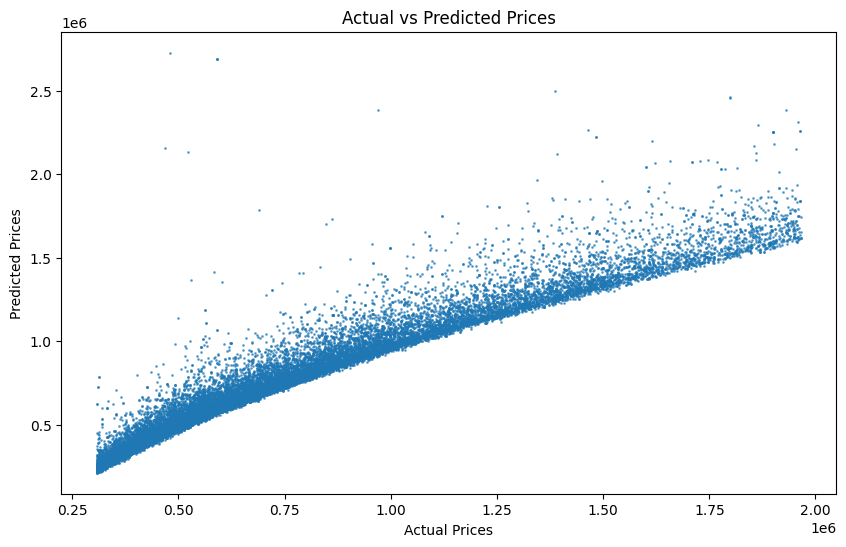

In [45]:


# Визуализация фактических значений против предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## L1 (Lasso)

https://www.youtube.com/watch?v=NGf0voTMlcs&t=63s

In [46]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=0.01)  # Регуляризация
model2.fit(X_train, y_train)
print(pd.Series(model2.coef_, index=X.columns))

# Предсказания на тестовом наборе
y_pred = model2.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

longitude                   -10069.601619
bathrooms                     2475.480626
bedrooms                      8337.328902
floorAreaSqM                296636.593591
livingRooms                  -7116.278622
Percent                      -1288.803640
pricePerSqM                 212552.215262
distance_from_buckingham      1052.536924
dtype: float64
RMSE: 90234.32885281334
R2 Score: 0.9376125801269037


## L2 (Ridge)

https://www.youtube.com/watch?v=Q81RR3yKn30&t=85s

In [47]:
from sklearn.linear_model import Ridge
model3 = Ridge(alpha=0.01)
model3.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model3.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 90234.32954980338
R2 Score: 0.9376125791631151


In [ ]:
# Используем только площадь как признак
X = df[['floorAreaSqM']]  
y = df['saleEstimate_currentPrice']  

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model4 = LinearRegression()
model4.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model4.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 233265.20616517137
R2 Score: 0.5830793860096821


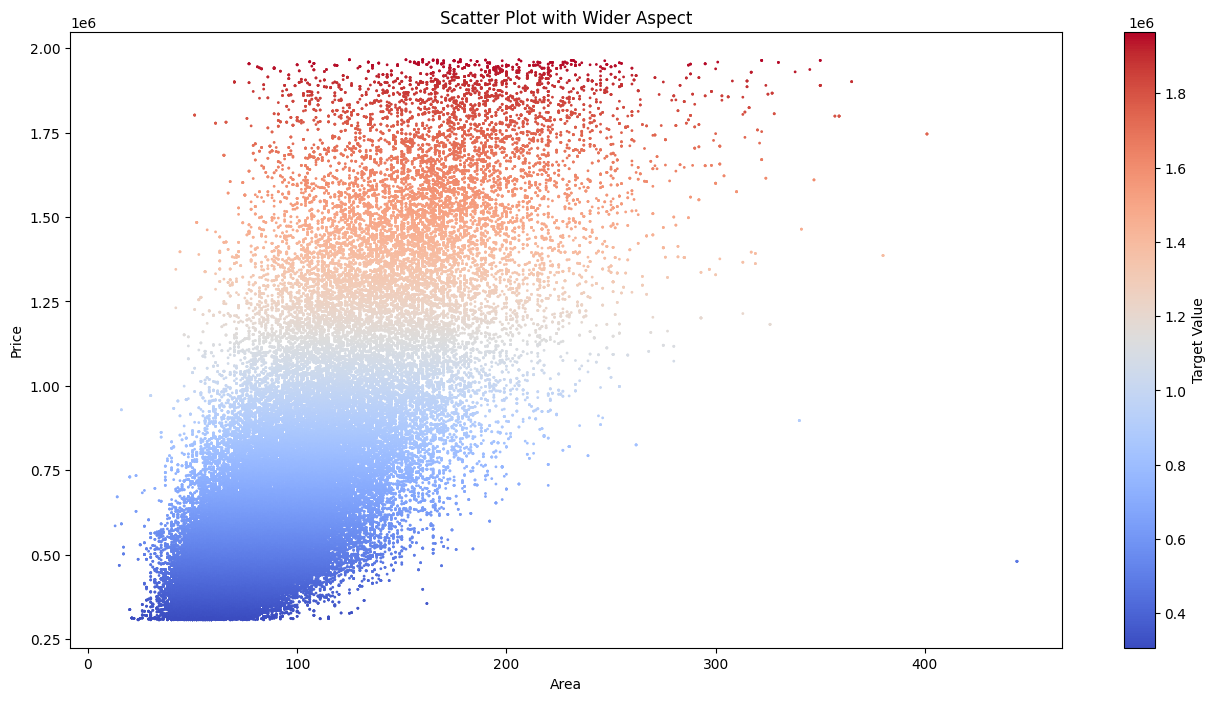

In [49]:
# Create a wider scatter plot
plt.figure(figsize=(16, 8))  # wide 16 high 8
plt.scatter(X, y, c=y, cmap='coolwarm', s=1)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot with Wider Aspect')
plt.colorbar(label='Target Value')
plt.show()


In [50]:

# Coefficients
a = model4.coef_[0]  # Для линейной регрессии с одной переменной X
b = model4.intercept_

# linear regression
print(f"Уравнение: y = {a}x + {b}")

Уравнение: y = 6880.260156227653x + 60507.62998396077


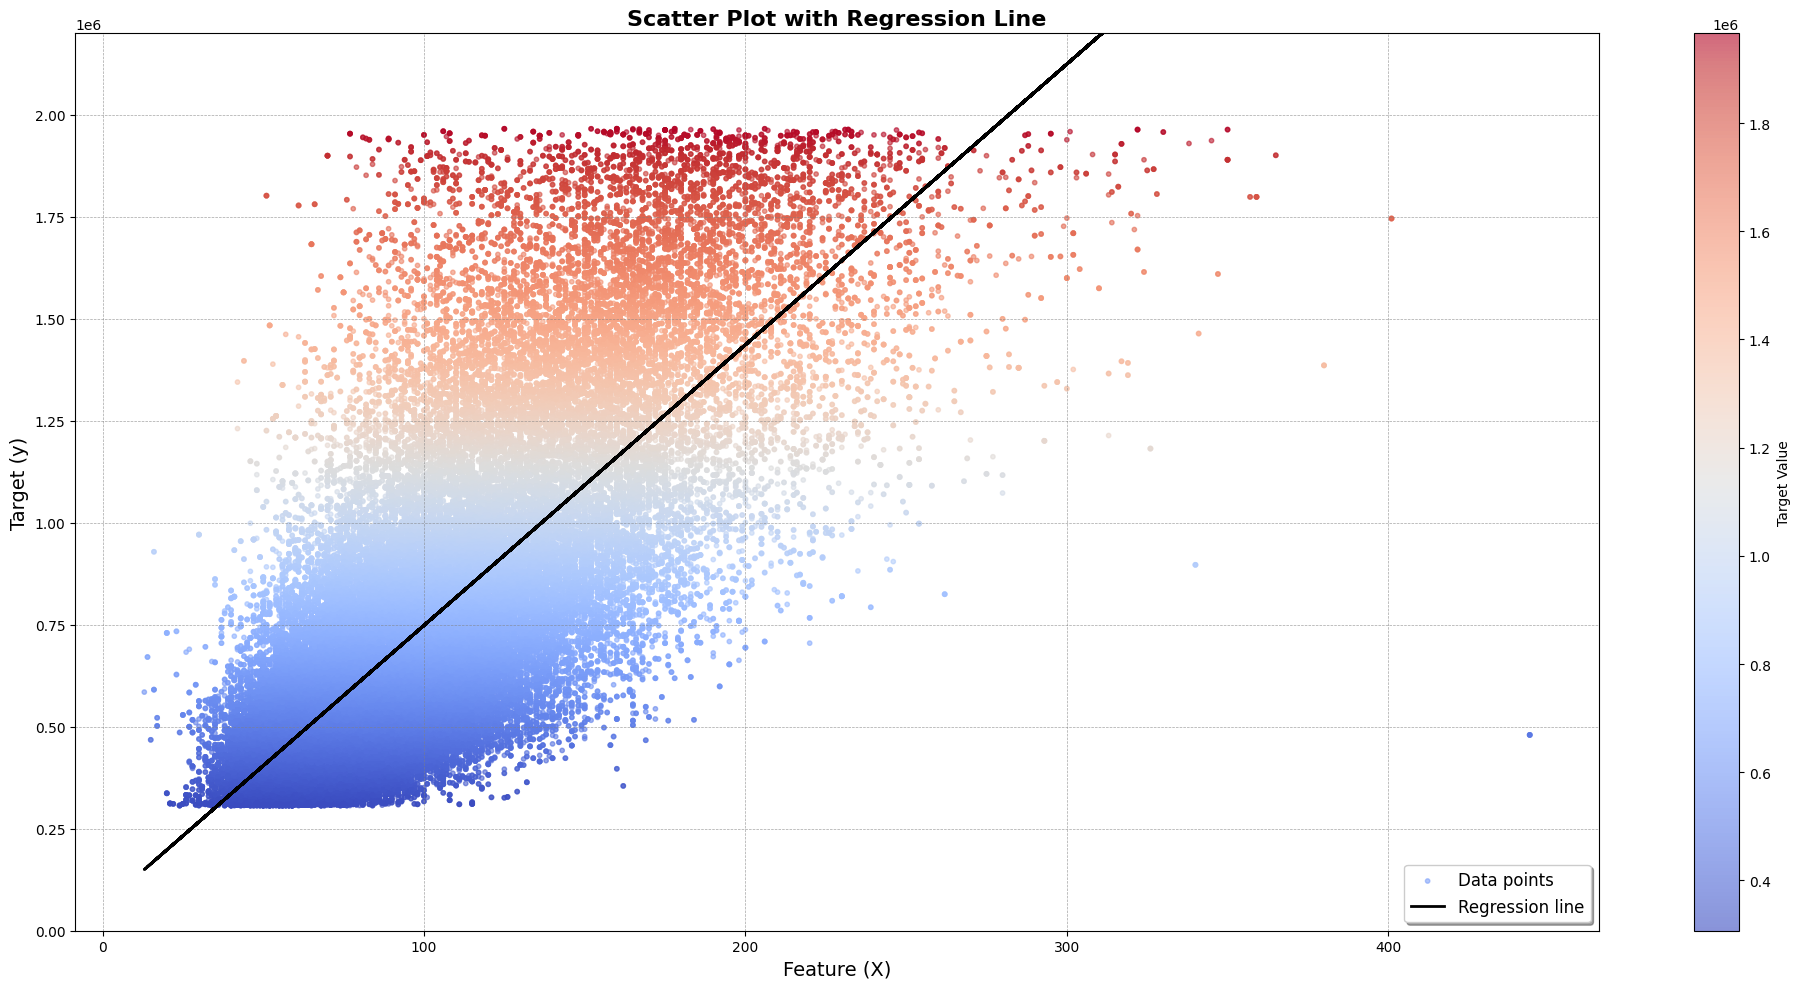

In [52]:
# Create a wider scatter plot with a regression line and limited y-axis
plt.figure(figsize=(20, 10))  # Set figure size

# Scatter plot with color map
plt.scatter(X, y, c=y, cmap='coolwarm', alpha=0.6, s=10, label='Data points')

# Add regression line
plt.plot(X, model4.predict(X), color='black', linewidth=2, label='Regression line')

# Titles and labels
plt.title('Scatter Plot with Regression Line', fontsize=16, fontweight='bold')
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (y)', fontsize=14)

# Limit y-axis to 2 million
plt.ylim(0, 2_200_000)  # Set lower limit to 0 and upper limit to 2 million

# Add grid and color bar
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.colorbar(label='Target Value')
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
# Make a prediction for a specific floor area
X_new = [[75]]  # Floor area in square meters (example: 75 m²)
print(model2.predict(X_new))  # Output: predicted price for 75 m²

[576527.14170103]


c:\Users\tania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Data and Movement Coordination Specialist

Flow and Data Operations Specialist

Data-Driven Flow Coordinator

Logistics and Data Flow Specialist

Stream Coordination and Data Analyst

Data and Flow Strategy Specialist

Movement and Data Integration Coordinator

Data and Operational Flow Specialist

Dynamic Flow and Data Specialist

Data-Enabled Flow Coordinator
